In [1]:
import os
import time
import random
import importlib
import csv

In [2]:
class TrafficLight(object):
    valid_states = [True, False]
    def __init__(self, state=None, period=None):
        self.state = state if state is not None else random.choice(self.valid_states)
        self.period = period if period is not None else random.choice([2,3,4,5])
        self.last_updated = 0
    def reset(self):
        self.last_updated = 0
    def update(self, t):
        if (t - self.last_updated >= self.period):
            self.state = not self.state
            self.last_updated = t
            print(self.state, t, self.last_updated)


In [55]:
import math
from collections import OrderedDict
class Environment(object):
    valid_actions = [None, 'forward', 'left', 'right']
    valid_inputs = {'light': TrafficLight.valid_states,
                   'oncoming': valid_actions, 'left': valid_actions,
                    'right': valid_actions}
    valid_headings = [(1, 0), (0, -1), (-1, 0), (0, 1)] #E,N,W,S
    hard_time_limit = -100 
    
    def __init__(self, verbose = False, num_dummies = 100, grid_size = (8,6)):
        self.num_dummies = num_dummies
        
        self.verbose = verbose
        
        self.done = False
        self.t = 0
        self.agent_states = OrderedDict()
        self.step_data = {}
        self.success = None
        
        #Road network
        self.grid_size = grid_size # (columns, rows)
        self.bounds = (1, 2, self.grid_size[0], self.grid_size[1] + 1)
        self.block_size = 100
        self.hang = 0.6
        self.intersections = OrderedDict()
        self.roads = []
        
        for x in xrange(self.bounds[0], self.bounds[2] + 1):
            for y in xrange(self.bounds[1], self.bounds[3] + 1):
                self.intersections[(x, y)] = TrafficLight()
        

        for a in self.intersections:
            for b in self.intersections:
                if a == b:
                    continue
                if(abs(a[0] - b[0]) + abs(a[1] - b[1])) == 1:
                    self.roads.append((a,b))
        
        # Add environment boundaries
        for x in xrange(self.bounds[0], self.bounds[2] + 1):
            self.roads.append(((x, self.bounds[1] - self.hang), (x, self.bounds[1])))
            self.roads.append(((x, self.bounds[3] + self.hang), (x, self.bounds[3])))
            
        for y in xrange(self.bounds[1], self.bounds[3] + 1):
            self.roads.append(((self.bounds[0] - self.hang, y), (self.bounds[0], y)))
            self.roads.append(((self.bounds[2] + self.hang, y), (self.bounds[2], y)))
        
        # create dummy agents
        for i in xrange(self.num_dummies):
            self.create_agent(DummyAgent)
    
        self.primary_agent  = None
        self.enforce_deadline = False
        
        # Trial Data
        
        self.trial_data = {
            'testing': False,
            'initial_distance': 0,
            'initial_deadline': 0,
            'net_reward': 0.0,
            'final_deadline': None,
            'actions': {0:0,1:0,2:0,3:0,4:0},
            'success': 0
        }
    
    def create_agent(self, agent_class, *args, **kwargs):
        agent = agent_class(self, *args, **kwargs)
        self.agent_states[agent] = {'location':random.choice(self.intersections.keys()), 'heading': (0, 1)}
        return agent

In [56]:
e = Environment()
print e.bounds, e.grid_size

(1, 2, 8, 7) (8, 6)


((1, 1.4), (1, 2))
((2, 1.4), (2, 2))
((3, 1.4), (3, 2))
((4, 1.4), (4, 2))
((5, 1.4), (5, 2))
((6, 1.4), (6, 2))
((7, 1.4), (7, 2))
((8, 1.4), (8, 2))


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

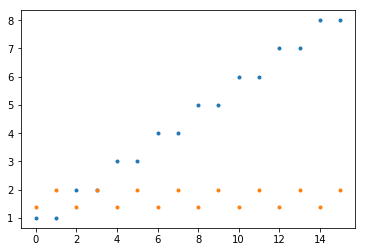

In [13]:
roads = []
for x in range(1,9):
    roads.append((x, 1.4))
    roads.append((x, 2))
plt.plot(roads, '.')

In [1]:
import random

In [12]:
if random.random()>0.5:
    print 'Hello'
else:
    print 'Bye'

Hello


In [13]:
x = {'a': 1, 'b': 2}

In [24]:
x.keys()[1]

'b'

In [22]:
(x.values()).index(2)

1

In [34]:
import pandas as pd
data = pd.read_csv('logs/sim_no-learning.csv')

In [35]:
data.head(n= 10)

,trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success
0,1,False,"{'a': 0.5, 'e': 1.0}",25,0,-71.092227,"{0: 19, 1: 1, 2: 4, 3: 0, 4: 1}",0
1,2,False,"{'a': 0.5, 'e': 1.0}",25,0,-129.673578,"{0: 14, 1: 2, 2: 5, 3: 4, 4: 0}",0
2,3,False,"{'a': 0.5, 'e': 1.0}",25,0,-120.892956,"{0: 16, 1: 3, 2: 4, 3: 0, 4: 2}",0
3,4,False,"{'a': 0.5, 'e': 1.0}",20,0,-130.887570,"{0: 11, 1: 4, 2: 2, 3: 1, 4: 2}",0
4,5,False,"{'a': 0.5, 'e': 1.0}",20,0,-177.282167,"{0: 9, 1: 1, 2: 6, 3: 2, 4: 2}",0
5,6,False,"{'a': 0.5, 'e': 1.0}",25,0,-162.253440,"{0: 10, 1: 4, 2: 9, 3: 1, 4: 1}",0
6,7,False,"{'a': 0.5, 'e': 1.0}",20,11,-57.250811,"{0: 5, 1: 0, 2: 3, 3: 0, 4: 1}",1
7,8,False,"{'a': 0.5, 'e': 1.0}",20,0,-50.707191,"{0: 13, 1: 1, 2: 6, 3: 0, 4: 0}",0
8,9,False,"{'a': 0.5, 'e': 1.0}",20,0,-111.177206,"{0: 13, 1: 4, 2: 0, 3: 1, 4: 2}",0
9,10,False,"{'a': 0.5, 'e': 1.0}",25,0,-94.322635,"{0: 10, 1: 9, 2: 6, 3: 0, 4: 0}",0


In [36]:
import matplotlib.pyplot as plt
% matplotlib inline

In [41]:
data['average_reward'] = (data['net_reward'] / (data['initial_deadline'] - data['final_deadline'])).mean()
import ast

In [42]:
data['minor'] = (data['actions'].apply(lambda x: ast.literal_eval(x)[1]) * 1.0 / (data['initial_deadline'] - data['final_deadline'])).mean()

In [48]:
data

,trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success,average_reward,minor
0,1,False,"{'a': 0.5, 'e': 1.0}",25,0,-71.092227,"{0: 19, 1: 1, 2: 4, 3: 0, 4: 1}",0,-5.115133,0.126222
1,2,False,"{'a': 0.5, 'e': 1.0}",25,0,-129.673578,"{0: 14, 1: 2, 2: 5, 3: 4, 4: 0}",0,-5.115133,0.126222
2,3,False,"{'a': 0.5, 'e': 1.0}",25,0,-120.892956,"{0: 16, 1: 3, 2: 4, 3: 0, 4: 2}",0,-5.115133,0.126222
3,4,False,"{'a': 0.5, 'e': 1.0}",20,0,-130.887570,"{0: 11, 1: 4, 2: 2, 3: 1, 4: 2}",0,-5.115133,0.126222
4,5,False,"{'a': 0.5, 'e': 1.0}",20,0,-177.282167,"{0: 9, 1: 1, 2: 6, 3: 2, 4: 2}",0,-5.115133,0.126222
5,6,False,"{'a': 0.5, 'e': 1.0}",25,0,-162.253440,"{0: 10, 1: 4, 2: 9, 3: 1, 4: 1}",0,-5.115133,0.126222
6,7,False,"{'a': 0.5, 'e': 1.0}",20,11,-57.250811,"{0: 5, 1: 0, 2: 3, 3: 0, 4: 1}",1,-5.115133,0.126222
7,8,False,"{'a': 0.5, 'e': 1.0}",20,0,-50.707191,"{0: 13, 1: 1, 2: 6, 3: 0, 4: 0}",0,-5.115133,0.126222
8,9,False,"{'a': 0.5, 'e': 1.0}",20,0,-111.177206,"{0: 13, 1: 4, 2: 0, 3: 1, 4: 2}",0,-5.115133,0.126222
9,10,False,"{'a': 0.5, 'e': 1.0}",25,0,-94.322635,"{0: 10, 1: 9, 2: 6, 3: 0, 4: 0}",0,-5.115133,0.126222


In [1]:
x = {}

In [11]:
x['a'] = 1
x['b'] = 1

In [12]:
x.keys()

['a', 'b']

In [15]:
x.keys()[x.values().index(1)]

'a'

In [16]:
import math 
math.e

2.718281828459045

In [70]:
v = {'forward': 0, None: 0, 'left': 0}

In [71]:
v['left']

0

In [75]:
l = []
for k,val in v.iteritems():
    if val == 0:
        l.append(k)

In [76]:
l

['forward', None, 'left']

In [55]:
e = 1.0
for i in range(0, 19):
    e = e - 0.05

In [68]:
x = []
for i in range(0, 100):
    x.append(2**-i)





In [6]:

import matplotlib.pyplot as plt
% matplotlib inline

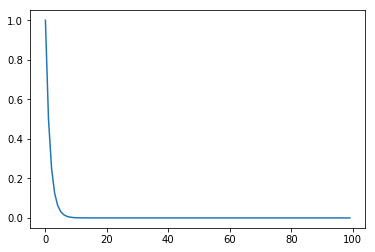

In [101]:
plt.plot(x)

In [77]:
import random 


In [94]:
random.uniform(0, 1)

0.5747998969982715

In [13]:
import math
n_trials = 1
ep = 1.0
a = -0.01
t = []
while(ep>0.001):
    ep = math.e**(a*n_trials)
    n_trials = n_trials + 1
    t.append(ep)


In [14]:
n_trials

692

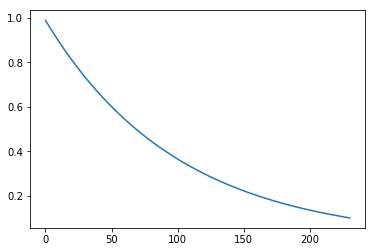

In [29]:
plt.plot(t)